In [24]:
%pylab inline
import numpy as np
from scipy import stats
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
data = np.random.randn(100)

In [3]:
with pm.Model() as model: 
    mu = pm.Normal('mu', mu=0, sd=1, testval=0)
    sd = pm.HalfNormal('sd', sd=1)
    n = pm.Normal('n', mu=mu, sd=sd, observed=data)

Cannot compute test value: input 0 (<TensorType(float32, matrix)>) of Op Dot22(<TensorType(float32, matrix)>, <TensorType(float32, matrix)>) missing default value


In [25]:
means, sds = pm.variational.advi( model=model, n=100000)

In [27]:
with model:
    step = pm.NUTS()
    trace = pm.sample(500, step)

 [-----------------100%-----------------] 500 of 500 complete in 0.2 sec

In [20]:
print trace['mu'].mean()
print trace['sd_log'].mean()
print trace['mu'].std()
print trace['sd_log'].std()

-0.0204449544885
0.0810269604953
0.122443685656
0.0671849228695


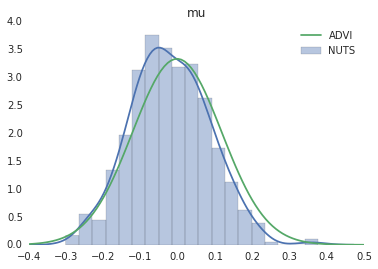

In [32]:
ax = sns.distplot(trace['mu'], label='NUTS')
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = stats.norm(means['mu'], sds['mu']).pdf(x)
ax.plot(x, y, label='ADVI')
ax.set_title('mu')
ax.legend(loc=0)

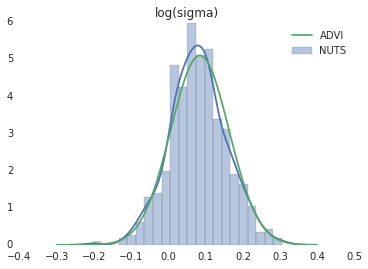

In [31]:
ax = sns.distplot(trace['sd_log'], label='NUTS')
xlim = ax.get_xlim()
x = np.linspace(xlim[0], xlim[1], 100)
y = stats.norm(means['sd_log'], sds['sd_log']).pdf(x)
ax.plot(x, y, label='ADVI')
ax.set_title('log(sigma)')
ax.legend(loc=0)